# Clustering

### Classifying heartbeat anomalies from stethoscope audio

Use BregmanToolkit to extract a feature vector out of our sound.
Download BregmanToolkit: https://github.com/arturogro/BregmanToolkit.git

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from bregman.suite import *

Set the hyper-paramaters for clustering

In [2]:
k = 4
max_iterations = 100

Select the locations for the audio files

In [3]:
filenames = tf.train.match_filenames_once('./dataset/set_a/*.wav')
count_num_files = tf.size(filenames)
filename_queue = tf.train.string_input_producer(filenames)
reader = tf.WholeFileReader()
filename, file_contents = reader.read(filename_queue)

Create an op to identify the pitch with the biggest contribution

In [4]:
chromo = tf.placeholder(tf.float32)
max_freqs = tf.argmax(chromo, 0)

Create a helper function to get the next audio file's Chromogram:

In [5]:
def get_next_chromogram(sess):
    audio_file = sess.run(filename)
    print('Loading {}'.format(audio_file))
    F = Chromagram(audio_file, nfft=16384, wfft=8192, nhop=2205)
    return F.X, audio_file

Create a helper function to extract a feature vector from the Chromogram data:

In [6]:
def extract_feature_vector(sess, chromo_data):
    num_features, num_samples = np.shape(chromo_data)
    freq_vals = sess.run(max_freqs, feed_dict={chromo: chromo_data})
    hist, bins = np.histogram(freq_vals, bins=range(num_features + 1))
    return hist.astype(float)  / num_samples

Extract a dataset of feature vectors by calling our helper functions above:

In [7]:
def get_dataset(sess):
    num_files = sess.run(count_num_files)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    xs = list()
    names = list()
    
    for _ in range(num_files):
        plt.figure()
        chromo_data, filename = get_next_chromogram(sess)
        
        plt.subplot(1, 2, 1)
        plt.imshow(chromo_data, cmap='Greys', interpolation='nearest')
        plt.title('Visualization of Sound Spectrum')
        
        plt.subplot(1, 2, 2)
        freq_vals = sess.run(max_freqs, feed_dict={chromo: chromo_data})
        plt.hist(freq_vals)
        plt.title('Histogram of Notes')
        plt.xlabel('Musical Note')
        plt.ylabel('Count')
        plt.savefig('{}.png'.format(filename))
        plt.show()
        
        names.append(filename)
        x = extract_feature_vector(sess, chromo_data)
        xs.append(x)
        
    xs = np.asmatrix(xs)
    coord.request_stop()
    coord.join(threads)
    return xs, names

k-means clustering requires 2 main phases: clustering and assignment. We'll also throw in an initialization helper function for good measure. Here are the three components:

In [ ]:
def initial_cluster_centroids(X, k):
    return X[0:k, :]

def assign_cluster(X, centroids):
    expanded_vectors = tf.expand_dims(X, 0)
    expanded_centroids = tf.expand_dims(centroids, 1)
    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)),2)
    mins = tf.argmin(distances, 0)
    return mins

def recompute_centroids(X, Y):
    sums = tf.unsorted_segment_sum(X, Y, k)
    counts = tf.unsorted_segment_sum(tf.ones_like(X), Y, k)
    return sums / counts

Open a session, obtain a dataset, and cluster the data:

Loading ./dataset/set_a/murmur__201106141148.wav


/usr/local/lib/python2.7/site-packages/bregman/features_base.py:353: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mxnorm = P.empty(self._cqtN) # Normalization coefficients
/usr/local/lib/python2.7/site-packages/bregman/features_base.py:357: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  for i in P.arange(self._cqtN)])


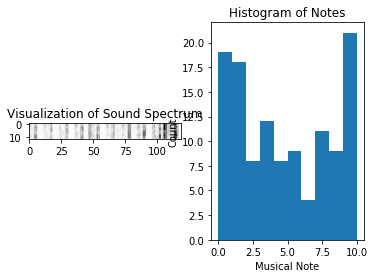

Loading ./dataset/set_a/artifact__201106030612.wav


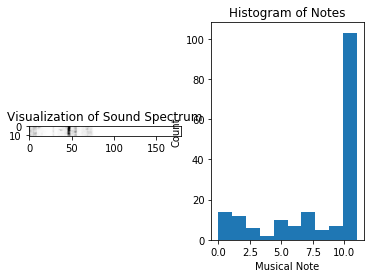

Loading ./dataset/set_a/Aunlabelledtest__20110501548.wav


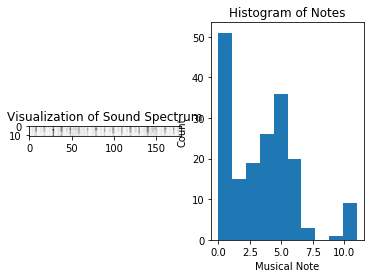

Loading ./dataset/set_a/normal__201106111136.wav


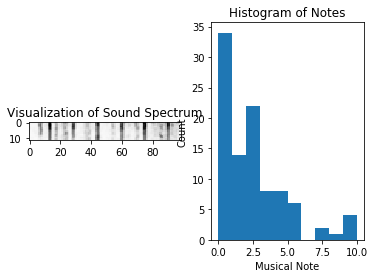

Loading ./dataset/set_a/artifact__201106040933.wav


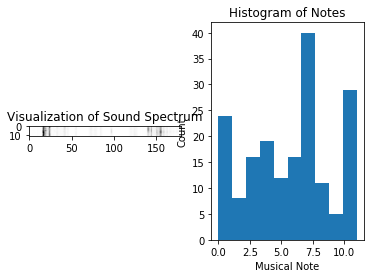

Loading ./dataset/set_a/artifact__201105051017.wav


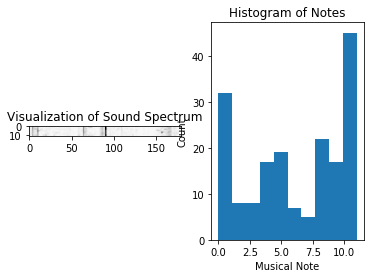

Loading ./dataset/set_a/Aunlabelledtest__201102200848.wav


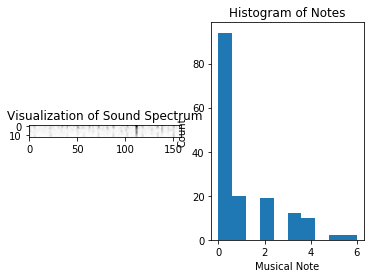

Loading ./dataset/set_a/extrahls__201102070251.wav


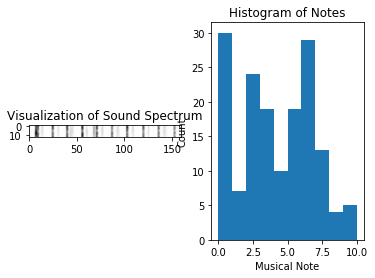

Loading ./dataset/set_a/artifact__201106021541.wav


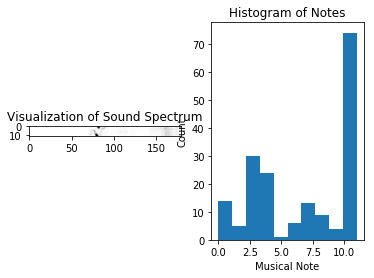

Loading ./dataset/set_a/Aunlabelledtest__201106061104.wav


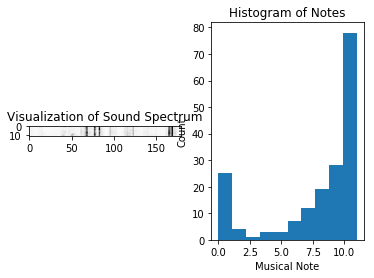

Loading ./dataset/set_a/Aunlabelledtest__201101110659.wav


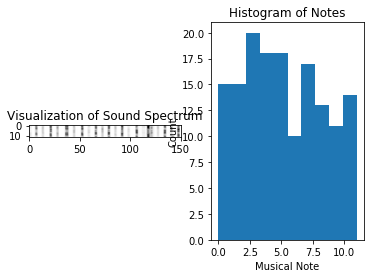

Loading ./dataset/set_a/Aunlabelledtest__201106061215.wav


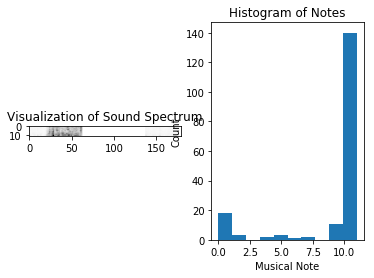

Loading ./dataset/set_a/Aunlabelledtest__201103201314.wav


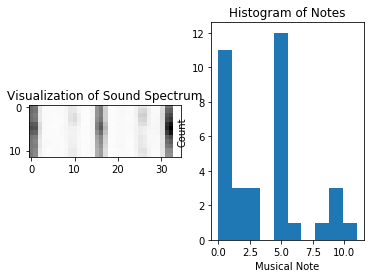

Loading ./dataset/set_a/extrahls__201101241423.wav


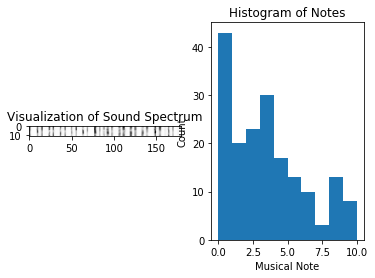

Loading ./dataset/set_a/extrahls__201101091153.wav


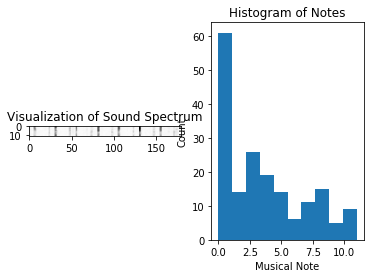

Loading ./dataset/set_a/artifact__201106010559.wav


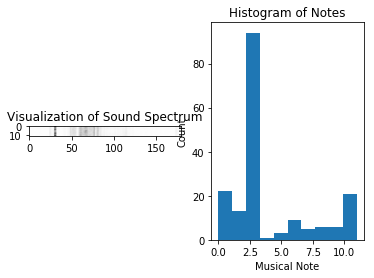

Loading ./dataset/set_a/murmur__201101051108.wav


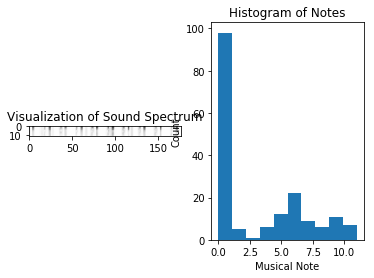

Loading ./dataset/set_a/artifact__201106101314.wav


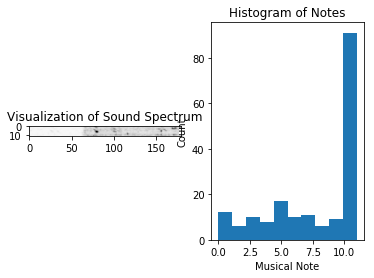

Loading ./dataset/set_a/artifact__201105060108.wav


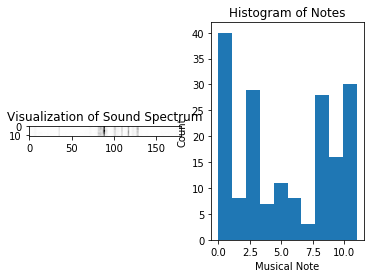

Loading ./dataset/set_a/artifact__201106050353.wav


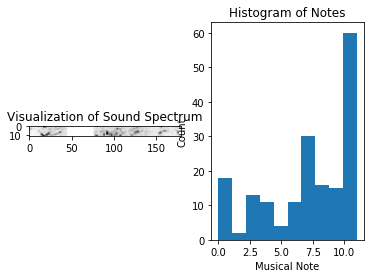

Loading ./dataset/set_a/extrahls__201102241217.wav


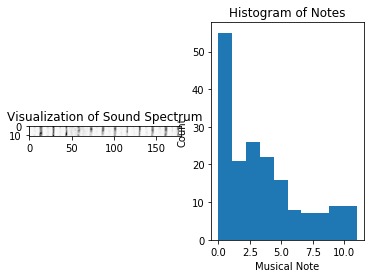

Loading ./dataset/set_a/Aunlabelledtest__2011040239.wav


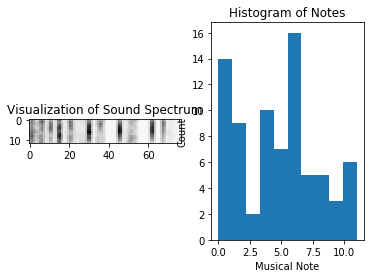

Loading ./dataset/set_a/artifact__201106161219.wav


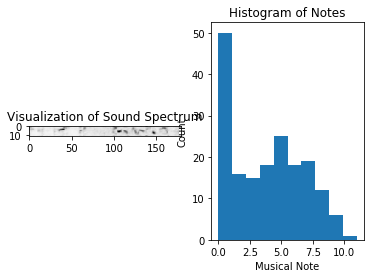

Loading ./dataset/set_a/Aunlabelledtest__201106120928.wav


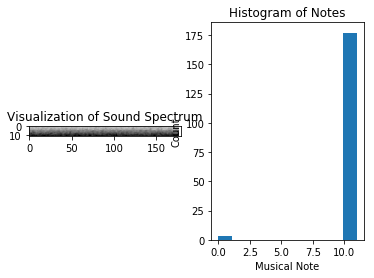

Loading ./dataset/set_a/artifact__201106171003.wav


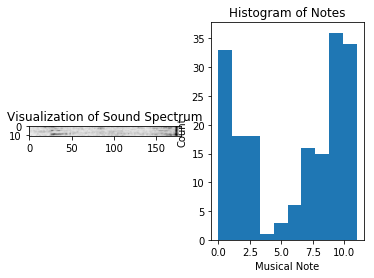

Loading ./dataset/set_a/Aunlabelledtest__201106191034.wav


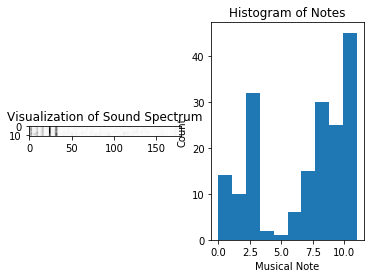

Loading ./dataset/set_a/normal__201105011626.wav


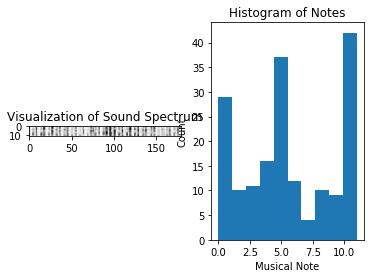

Loading ./dataset/set_a/artifact__201105041959.wav


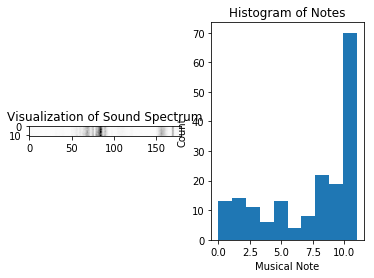

Loading ./dataset/set_a/Aunlabelledtest__201103140236.wav


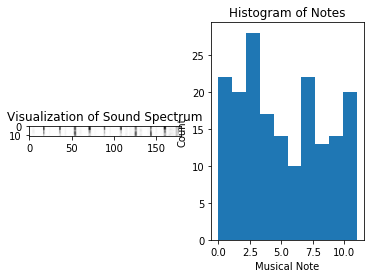

Loading ./dataset/set_a/murmur__201108222232.wav


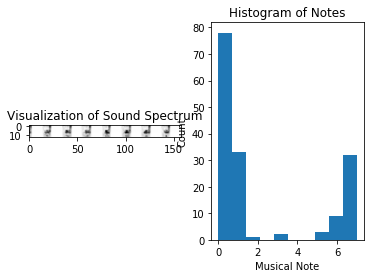

Loading ./dataset/set_a/normal__201102260502.wav


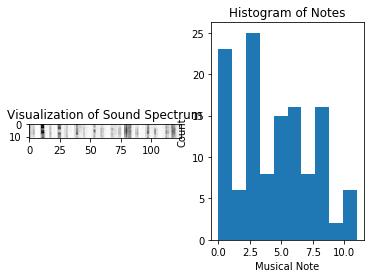

Loading ./dataset/set_a/murmur__201108222251.wav


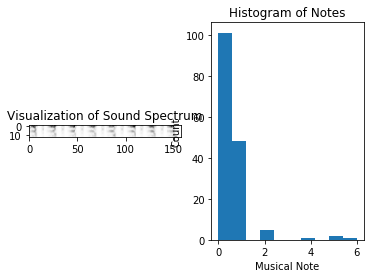

Loading ./dataset/set_a/murmur__201104241315.wav


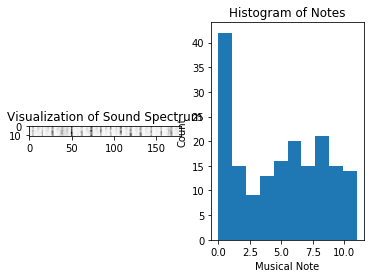

Loading ./dataset/set_a/murmur__201108222252.wav


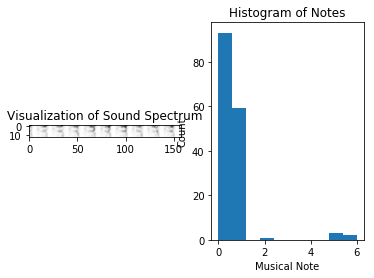

Loading ./dataset/set_a/artifact__201105190800.wav


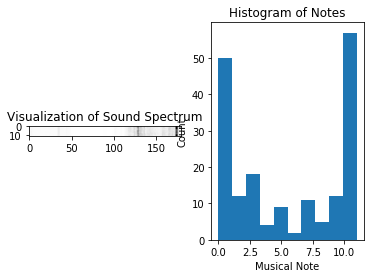

Loading ./dataset/set_a/murmur__201101051114.wav


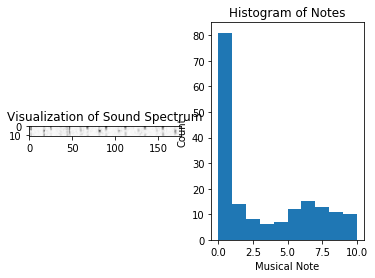

Loading ./dataset/set_a/artifact__201106190520.wav


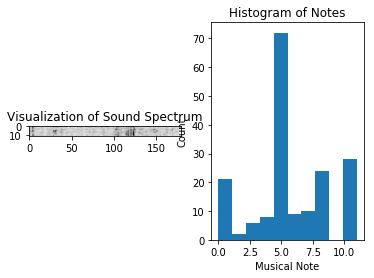

Loading ./dataset/set_a/Aunlabelledtest__201106030607.wav


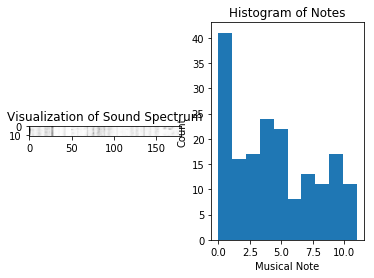

Loading ./dataset/set_a/murmur__201108222253.wav


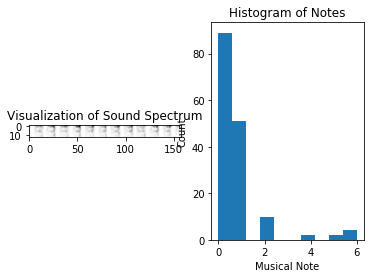

Loading ./dataset/set_a/artifact__201106220340.wav


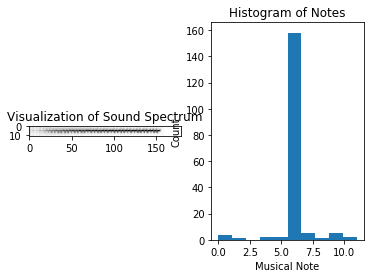

Loading ./dataset/set_a/Aunlabelledtest__201108222247.wav


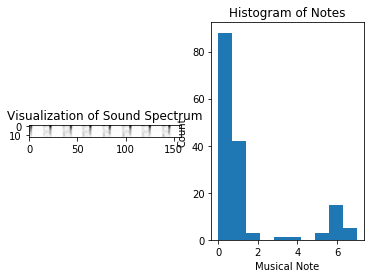

Loading ./dataset/set_a/murmur__201108222235.wav


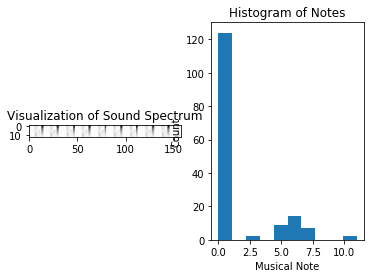

Loading ./dataset/set_a/normal__201103090635.wav


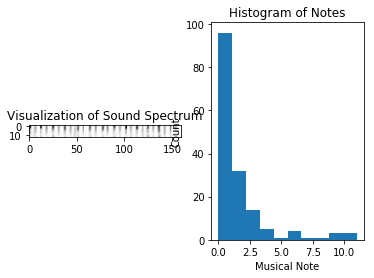

Loading ./dataset/set_a/artifact__201106110909.wav


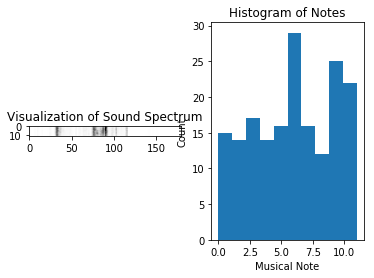

Loading ./dataset/set_a/extrahls__201104270459.wav


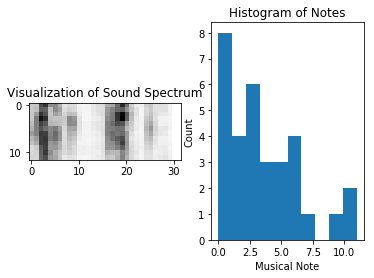

Loading ./dataset/set_a/normal__201103101140.wav


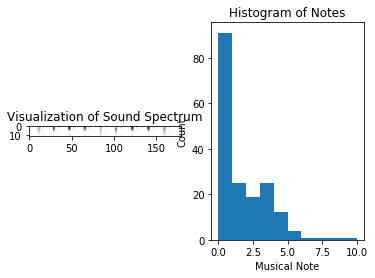

Loading ./dataset/set_a/normal__201103140822.wav


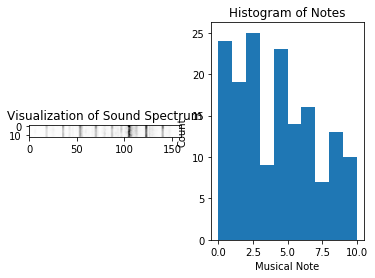

Loading ./dataset/set_a/normal__201105151450.wav


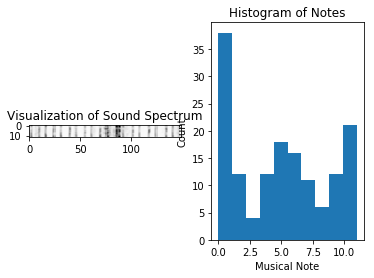

Loading ./dataset/set_a/artifact__201106040722.wav


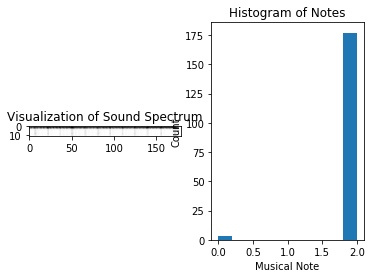

Loading ./dataset/set_a/extrahls__201101160808.wav


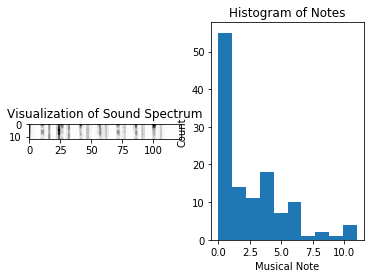

Loading ./dataset/set_a/extrahls__201101241433.wav


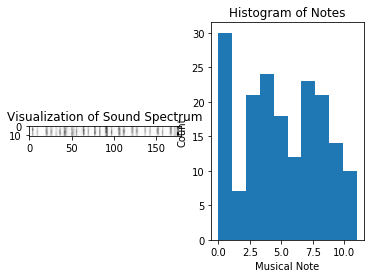

Loading ./dataset/set_a/artifact__201012172012.wav


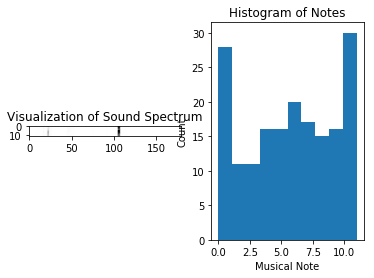

Loading ./dataset/set_a/murmur__201102051443.wav


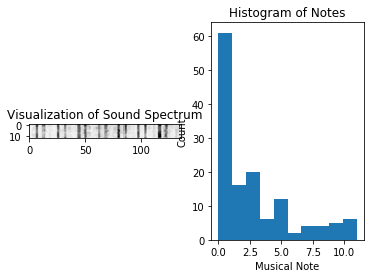

Loading ./dataset/set_a/normal__201103170121.wav


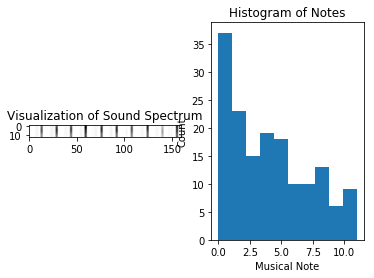

Loading ./dataset/set_a/artifact__201106221254.wav


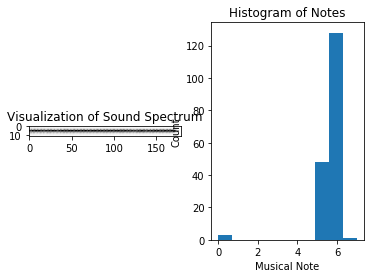

Loading ./dataset/set_a/artifact__201106211430.wav


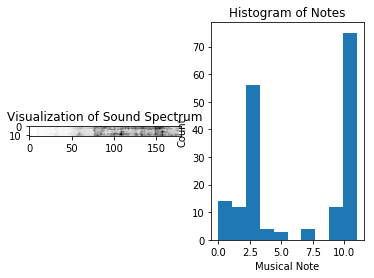

Loading ./dataset/set_a/artifact__201105040918.wav


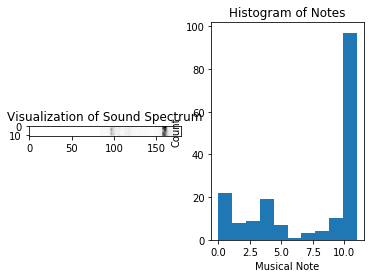

Loading ./dataset/set_a/normal__201106221450.wav


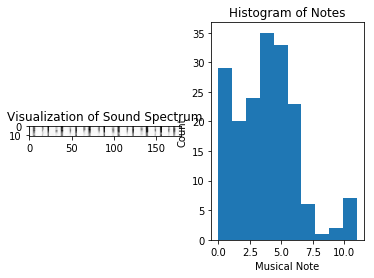

Loading ./dataset/set_a/murmur__201108222226.wav


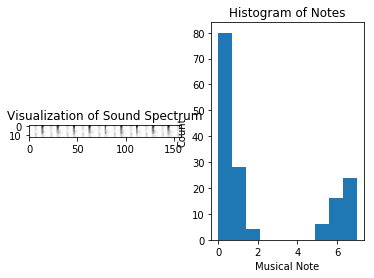

Loading ./dataset/set_a/Aunlabelledtest__201108011116.wav


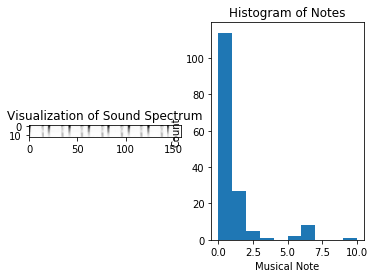

Loading ./dataset/set_a/Aunlabelledtest__201106031556.wav


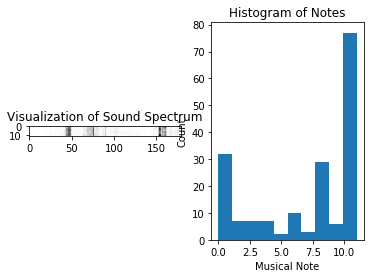

Loading ./dataset/set_a/normal__201104122156.wav


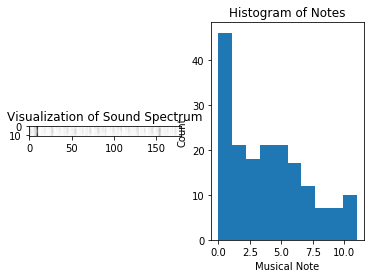

Loading ./dataset/set_a/Aunlabelledtest__201108222222.wav


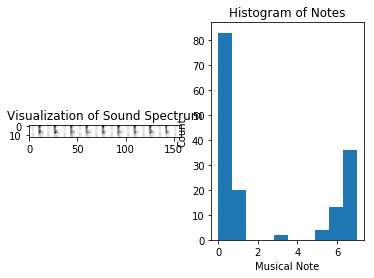

Loading ./dataset/set_a/artifact__201106031558.wav


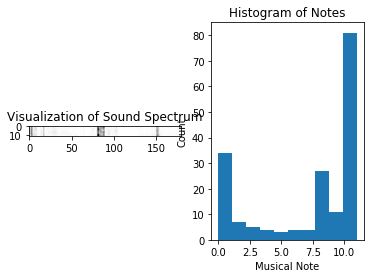

Loading ./dataset/set_a/Aunlabelledtest__201105011546.wav


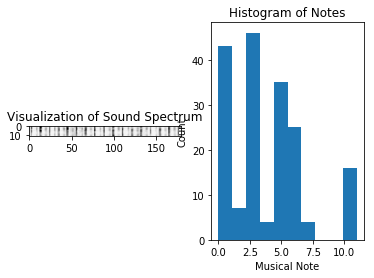

Loading ./dataset/set_a/Aunlabelledtest__201101061552.wav


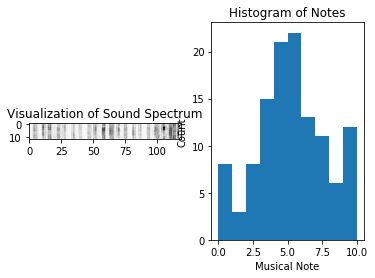

Loading ./dataset/set_a/artifact__201106121445.wav


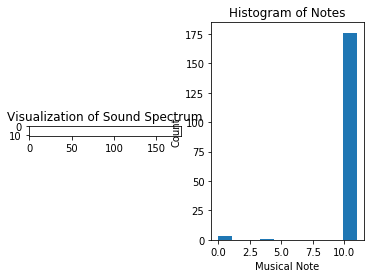

Loading ./dataset/set_a/normal__201103221214.wav


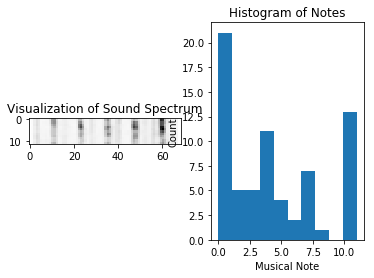

Loading ./dataset/set_a/Aunlabelledtest__201103232251.wav


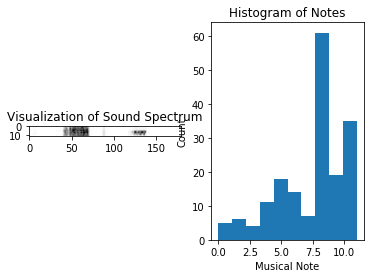

Loading ./dataset/set_a/murmur__201108222238.wav


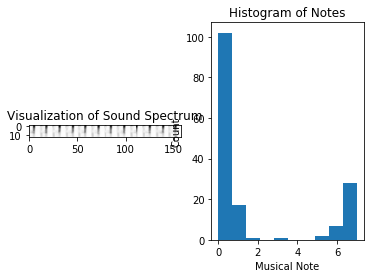

Loading ./dataset/set_a/extrahls__201104021355.wav


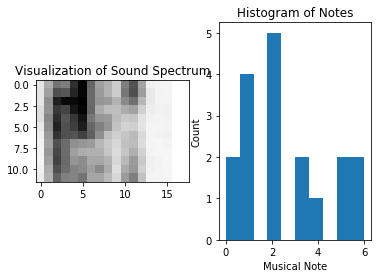

Loading ./dataset/set_a/Aunlabelledtest__201108222254.wav


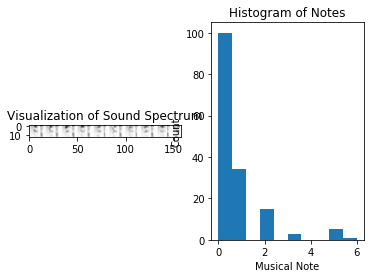

Loading ./dataset/set_a/Aunlabelledtest__201103200518.wav


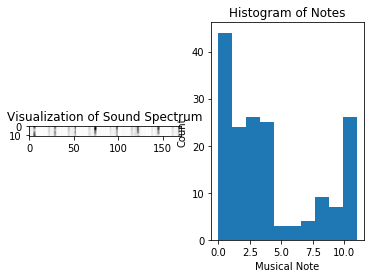

Loading ./dataset/set_a/normal__201106221418.wav


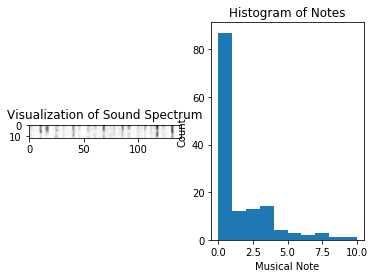

Loading ./dataset/set_a/artifact__201106061233.wav


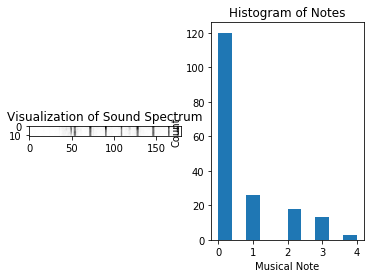

Loading ./dataset/set_a/Aunlabelledtest__201101091156.wav


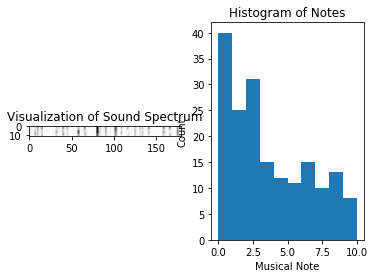

Loading ./dataset/set_a/Aunlabelledtest__201106170857.wav


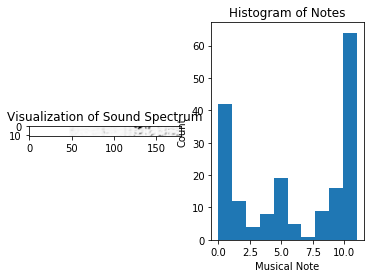

Loading ./dataset/set_a/normal__201108011118.wav


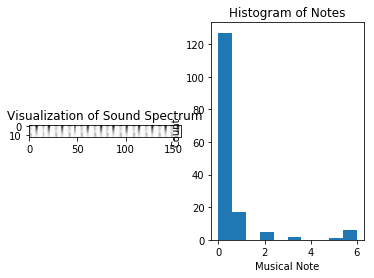

Loading ./dataset/set_a/extrahls__201104270458.wav


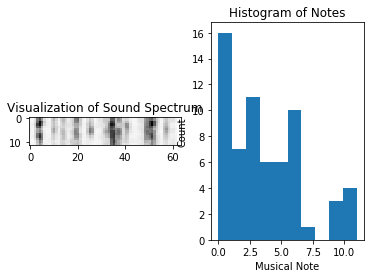

Loading ./dataset/set_a/normal__201106151236.wav


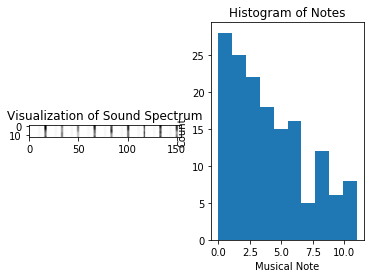

Loading ./dataset/set_a/Aunlabelledtest__201103011036.wav


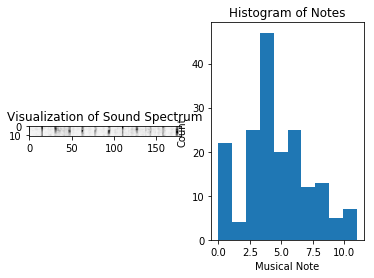

Loading ./dataset/set_a/Aunlabelledtest__201104012144.wav


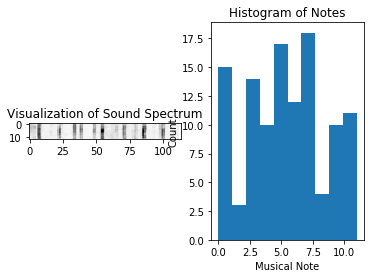

Loading ./dataset/set_a/Aunlabelledtest__201106171155.wav


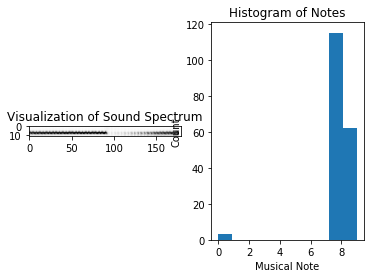

Loading ./dataset/set_a/extrahls__201102071835.wav


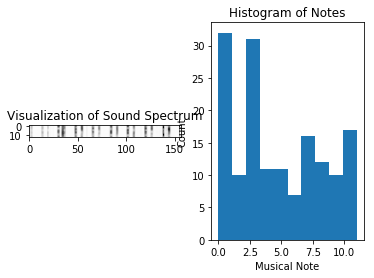

Loading ./dataset/set_a/normal__201105021804.wav


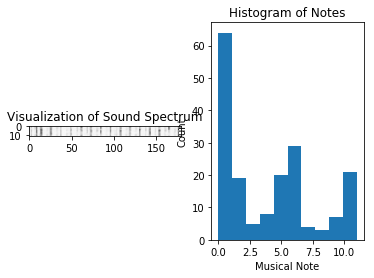

Loading ./dataset/set_a/artifact__201106121242.wav


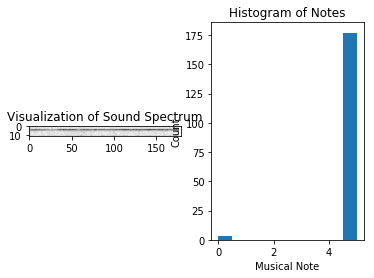

Loading ./dataset/set_a/extrahls__201101161027.wav


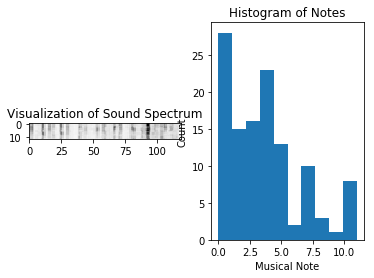

Loading ./dataset/set_a/artifact__201106010602.wav


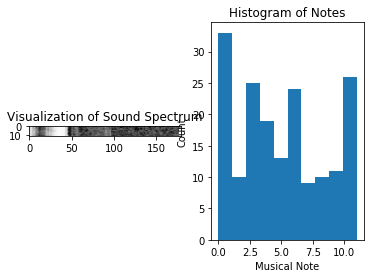

Loading ./dataset/set_a/murmur__201108222246.wav


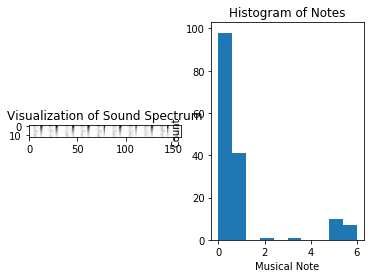

Loading ./dataset/set_a/murmur__201108222256.wav


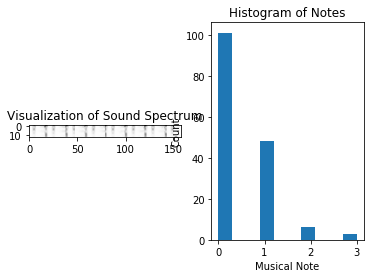

Loading ./dataset/set_a/normal__201108011115.wav


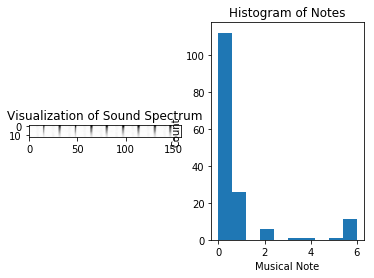

Loading ./dataset/set_a/murmur__201104291843.wav


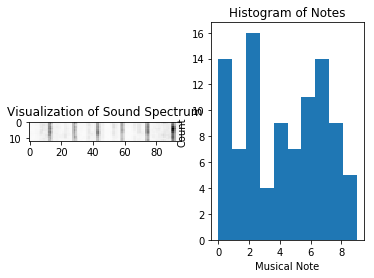

Loading ./dataset/set_a/Aunlabelledtest__201101241434.wav


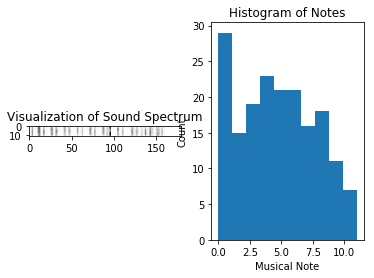

Loading ./dataset/set_a/extrahls__201101160804.wav


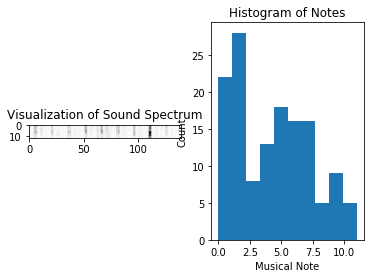

Loading ./dataset/set_a/murmur__201108222245.wav


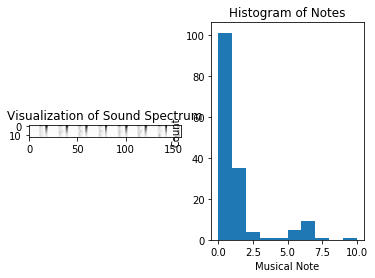

Loading ./dataset/set_a/extrahls__201104140118.wav


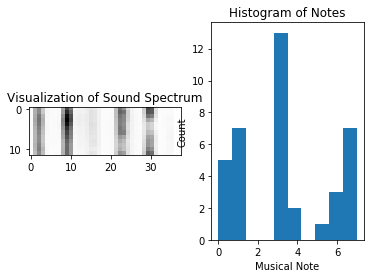

Loading ./dataset/set_a/murmur__201108222237.wav


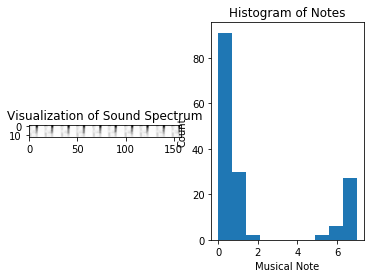

Loading ./dataset/set_a/murmur__201108222233.wav


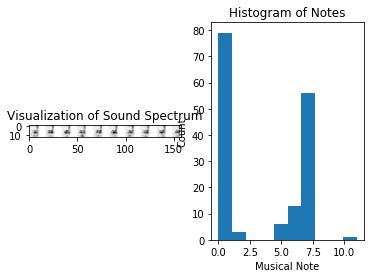

Loading ./dataset/set_a/murmur__201108222223.wav


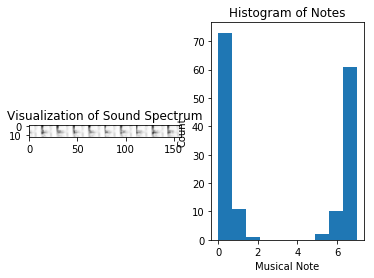

Loading ./dataset/set_a/normal__201103151912.wav


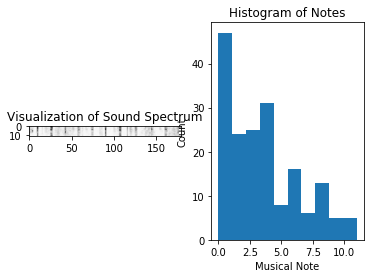

Loading ./dataset/set_a/extrahls__201103150114.wav


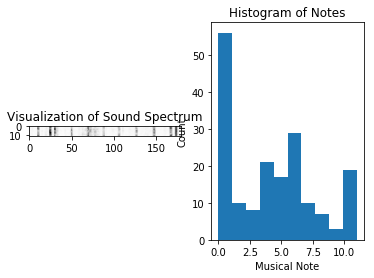

Loading ./dataset/set_a/normal__201101070538.wav


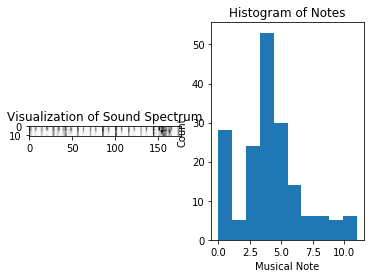

Loading ./dataset/set_a/normal__201102081321.wav


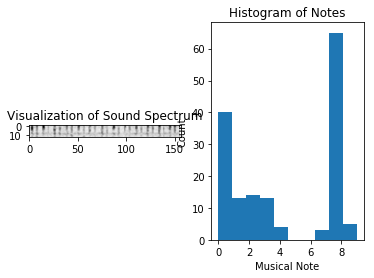

Loading ./dataset/set_a/artifact__201106141701.wav


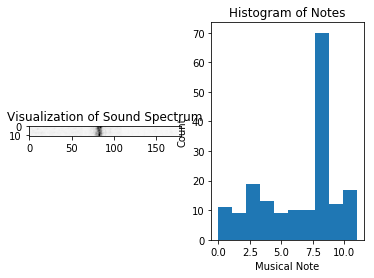

Loading ./dataset/set_a/Aunlabelledtest__201106130440.wav


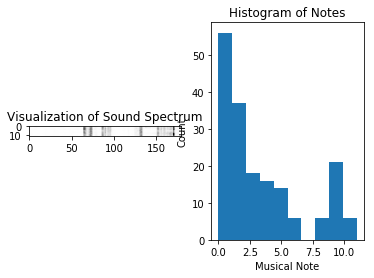

Loading ./dataset/set_a/artifact__201105280851.wav


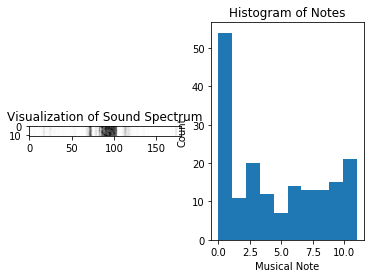

Loading ./dataset/set_a/murmur__201108222258.wav


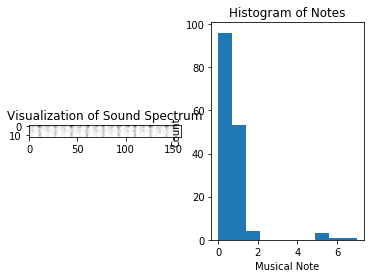

Loading ./dataset/set_a/Aunlabelledtest__201106040930.wav


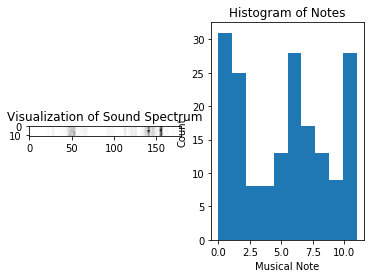

Loading ./dataset/set_a/Aunlabelledtest__201108222234.wav


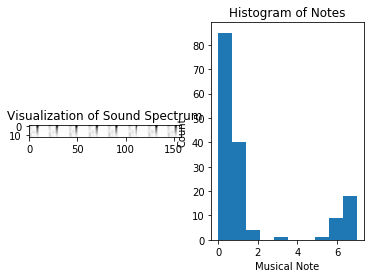

Loading ./dataset/set_a/extrahls__201101152255.wav


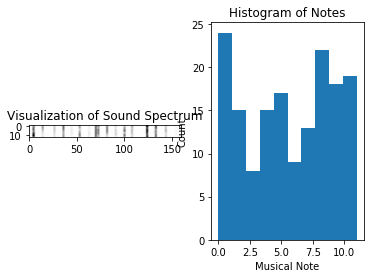

Loading ./dataset/set_a/Aunlabelledtest__201106150614.wav


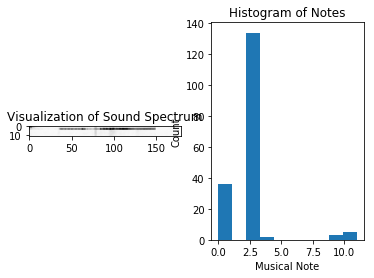

Loading ./dataset/set_a/artifact__201105061143.wav


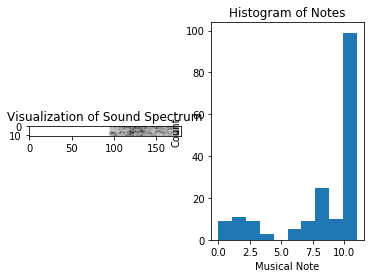

Loading ./dataset/set_a/Aunlabelledtest__201106211725.wav


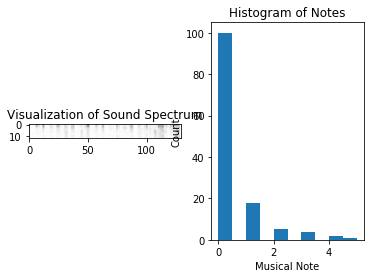

Loading ./dataset/set_a/normal__201101151127.wav


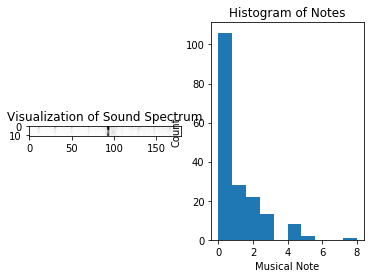

Loading ./dataset/set_a/artifact__201106070537.wav


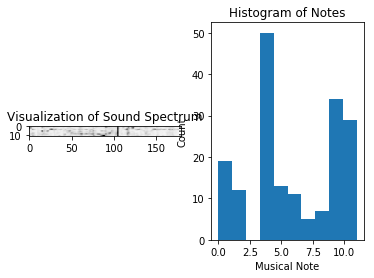

Loading ./dataset/set_a/artifact__201106131834.wav


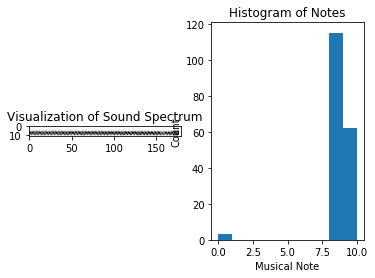

Loading ./dataset/set_a/murmur__201108222236.wav


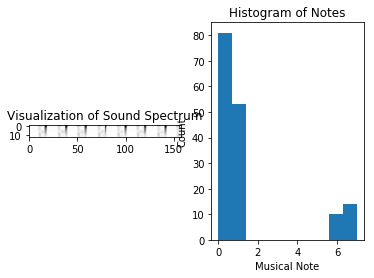

Loading ./dataset/set_a/artifact__201106041452.wav


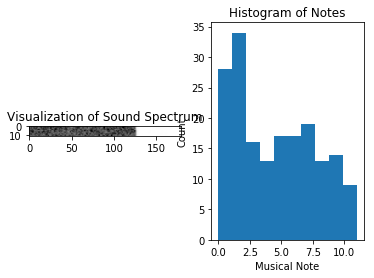

Loading ./dataset/set_a/Aunlabelledtest__201108222225.wav


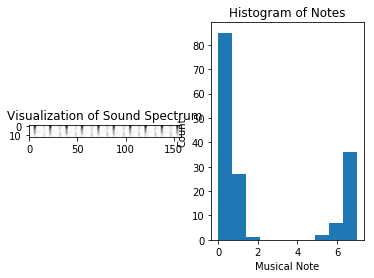

Loading ./dataset/set_a/Aunlabelledtest__201103241336.wav


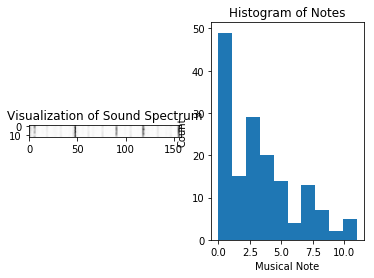

Loading ./dataset/set_a/normal__201102270940.wav


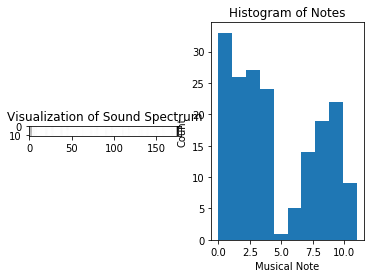

Loading ./dataset/set_a/murmur__201101051104.wav


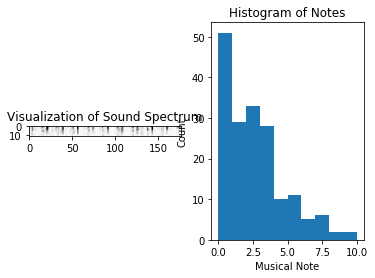

Loading ./dataset/set_a/normal__201106210943.wav


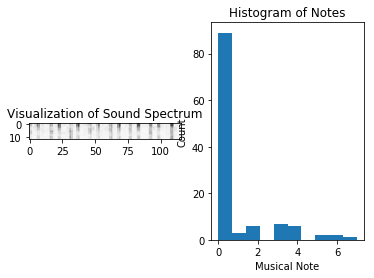

Loading ./dataset/set_a/Aunlabelledtest__201108011113.wav


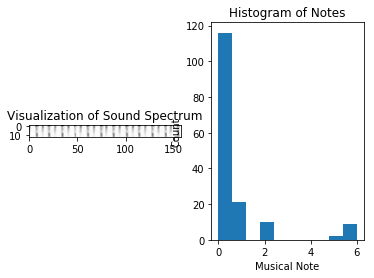

Loading ./dataset/set_a/artifact__201106211041.wav


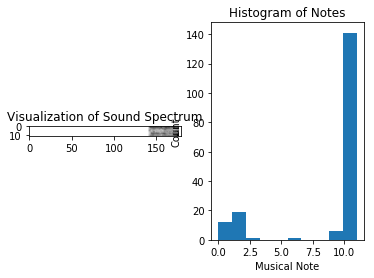

Loading ./dataset/set_a/normal__201108011112.wav


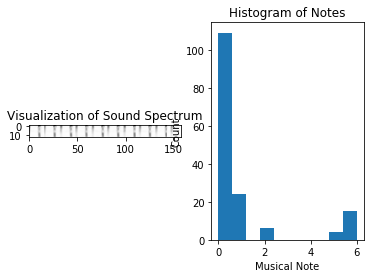

Loading ./dataset/set_a/Aunlabelledtest__201106010807.wav


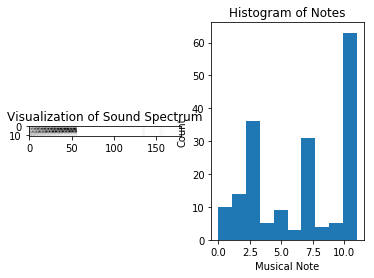

Loading ./dataset/set_a/murmur__201108222227.wav


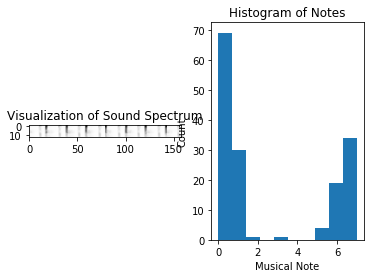

Loading ./dataset/set_a/artifact__201106212112.wav


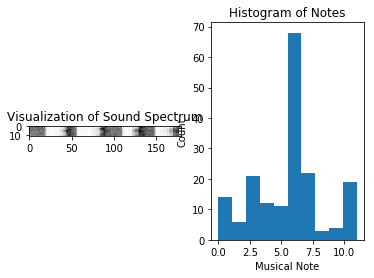

Loading ./dataset/set_a/Aunlabelledtest__201101220549.wav


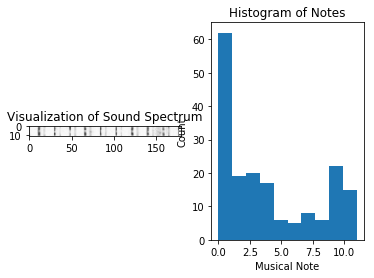

Loading ./dataset/set_a/murmur__201108222255.wav


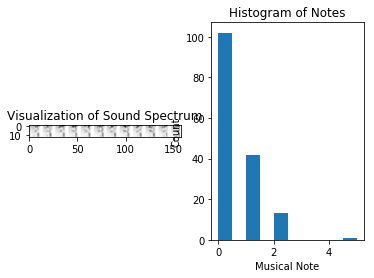

Loading ./dataset/set_a/artifact__201106131835.wav


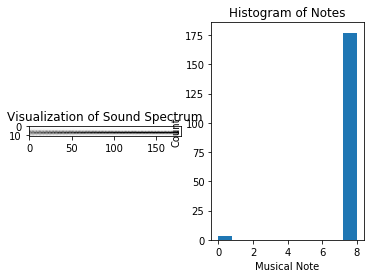

Loading ./dataset/set_a/Aunlabelledtest__201012172010.wav


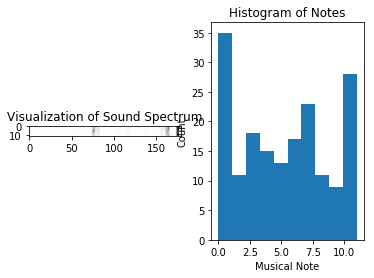

Loading ./dataset/set_a/Aunlabelledtest__201101152256.wav


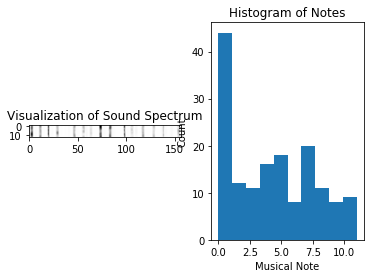

Loading ./dataset/set_a/Aunlabelledtest__201102081033.wav


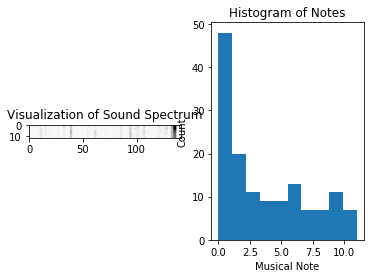

Loading ./dataset/set_a/normal__201102081152.wav


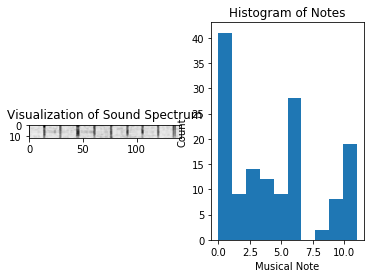

Loading ./dataset/set_a/extrahls__201103182227.wav


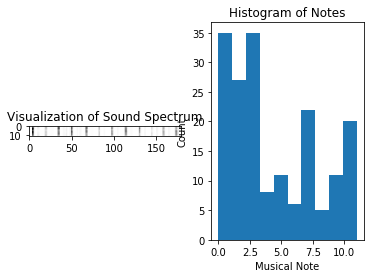

Loading ./dataset/set_a/artifact__201106111119.wav


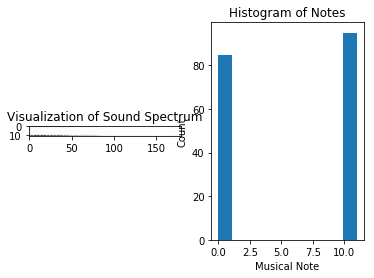

Loading ./dataset/set_a/normal__201102201230.wav


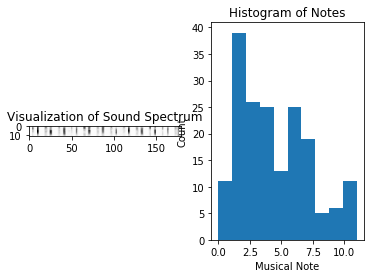

Loading ./dataset/set_a/Aunlabelledtest__201108222228.wav


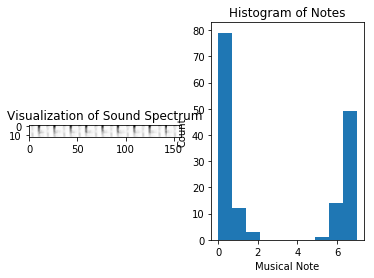

Loading ./dataset/set_a/artifact__201106161019.wav


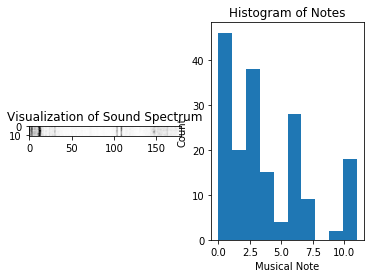

Loading ./dataset/set_a/Aunlabelledtest__201108222241.wav


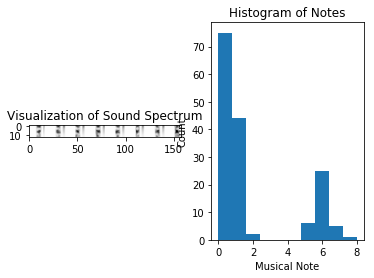

Loading ./dataset/set_a/artifact__201106161016.wav


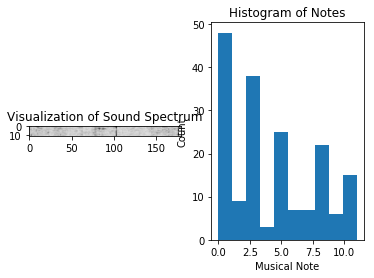

Loading ./dataset/set_a/Aunlabelledtest__201102081045.wav


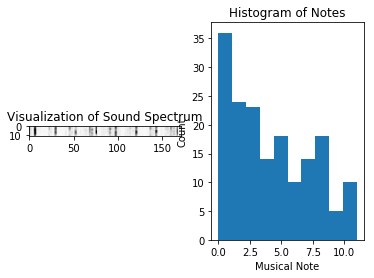

Loading ./dataset/set_a/artifact__201106070949.wav


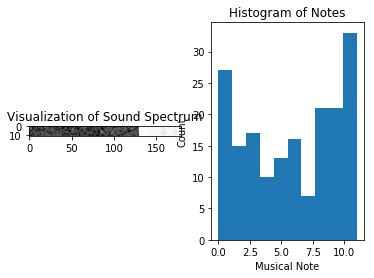

Loading ./dataset/set_a/Aunlabelledtest__201106111419.wav


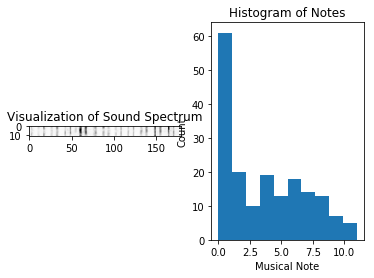

Loading ./dataset/set_a/Aunlabelledtest__201108011117.wav


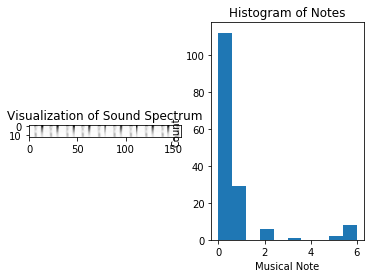

Loading ./dataset/set_a/Aunlabelledtest__201101051105.wav


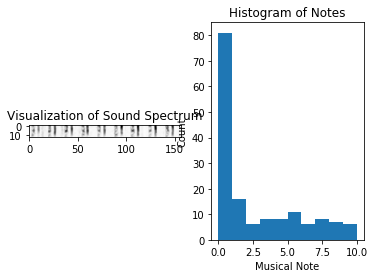

Loading ./dataset/set_a/normal__201103140132.wav


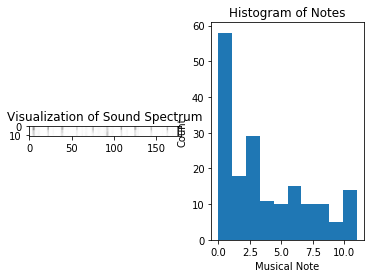

Loading ./dataset/set_a/Aunlabelledtest__201106100606.wav


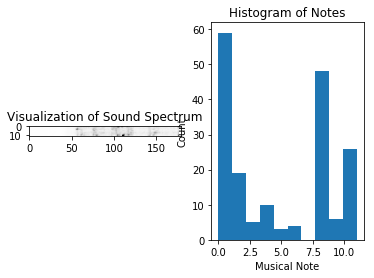

Loading ./dataset/set_a/extrahls__201103200218.wav


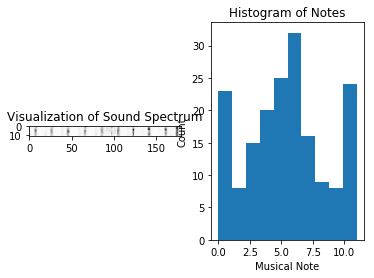

Loading ./dataset/set_a/Aunlabelledtest__201108222257.wav


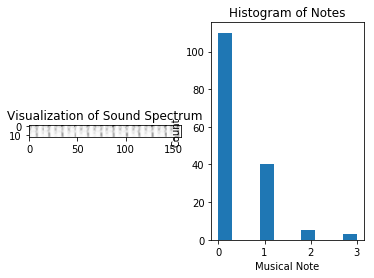

Loading ./dataset/set_a/murmur__201108222231.wav


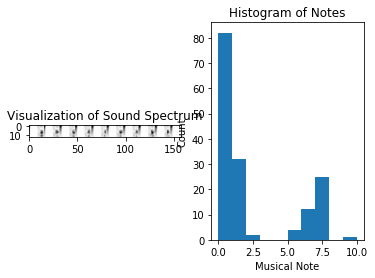

Loading ./dataset/set_a/murmur__201104021355.wav


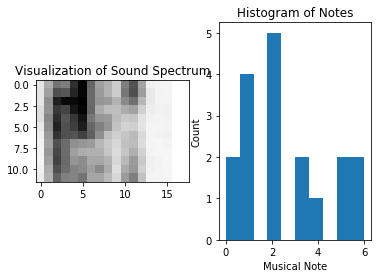

Loading ./dataset/set_a/normal__201108011114.wav


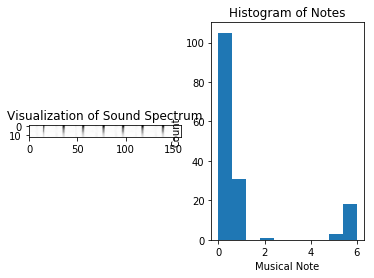

Loading ./dataset/set_a/artifact__201106101955.wav


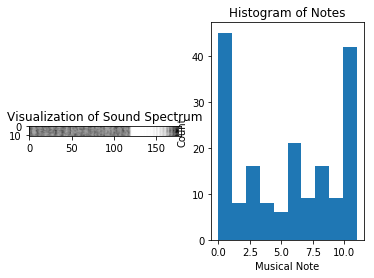

Loading ./dataset/set_a/normal__201105021654.wav


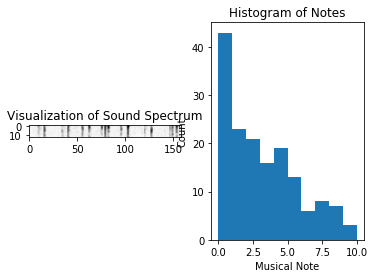

Loading ./dataset/set_a/extrahls__201101070953.wav


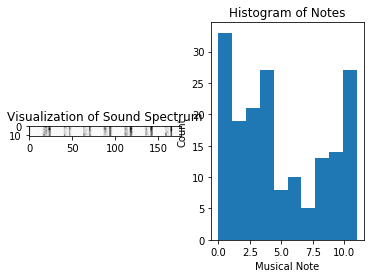

Loading ./dataset/set_a/normal__201104141251.wav


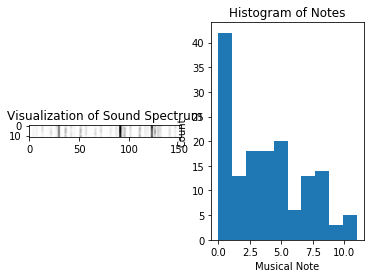

Loading ./dataset/set_a/normal__201106141148.wav


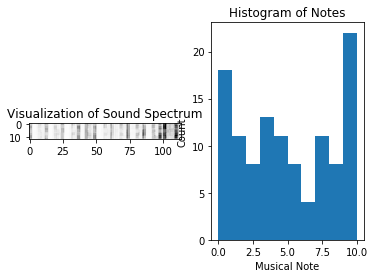

Loading ./dataset/set_a/normal__201103140135.wav


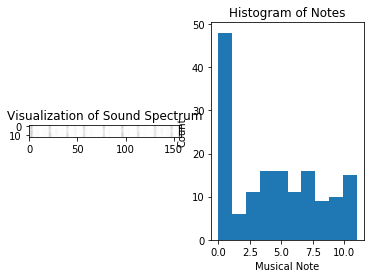

Loading ./dataset/set_a/artifact__201106040947.wav


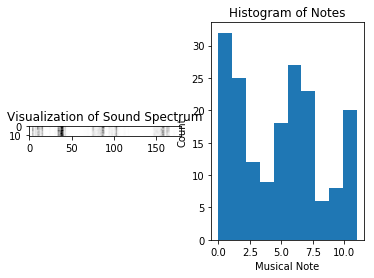

Loading ./dataset/set_a/murmur__201102052338.wav


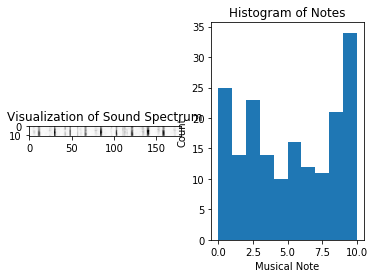

Loading ./dataset/set_a/Aunlabelledtest__201106212102.wav


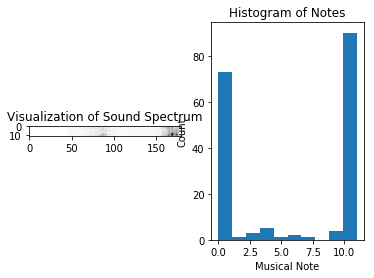

Loading ./dataset/set_a/Aunlabelledtest__201103170122.wav


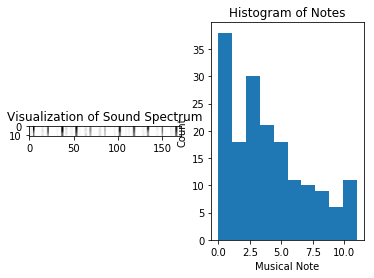

Loading ./dataset/set_a/Aunlabelledtest__201105031730.wav


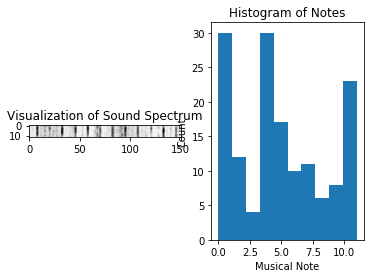

Loading ./dataset/set_a/Aunlabelledtest__201108011111.wav


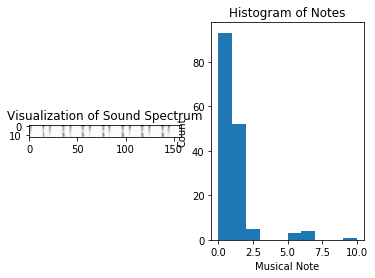

Loading ./dataset/set_a/murmur__201103291548.wav


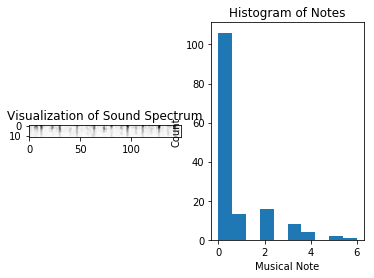

Loading ./dataset/set_a/murmur__201108222242.wav


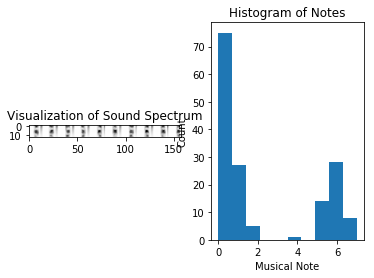

Loading ./dataset/set_a/murmur__201108222248.wav


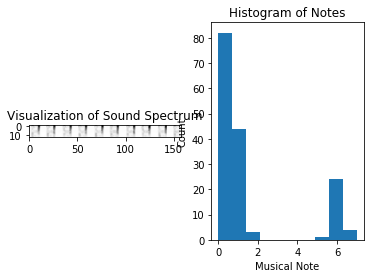

Loading ./dataset/set_a/Aunlabelledtest__201108222244.wav


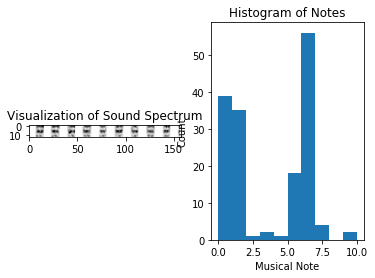

Loading ./dataset/set_a/murmur__201108222221.wav


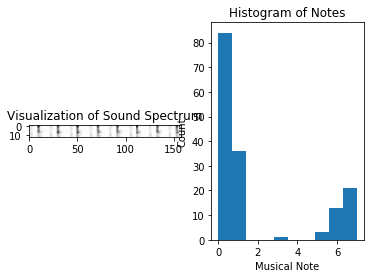

Loading ./dataset/set_a/murmur__201108222224.wav


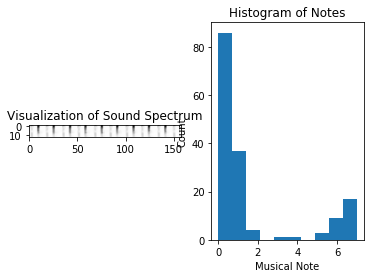

Loading ./dataset/set_a/extrahls__201103170134.wav


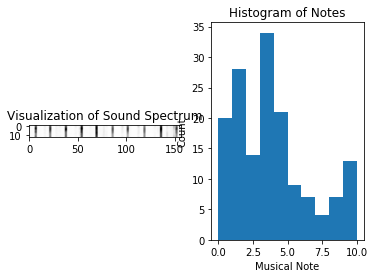

Loading ./dataset/set_a/murmur__201108222243.wav


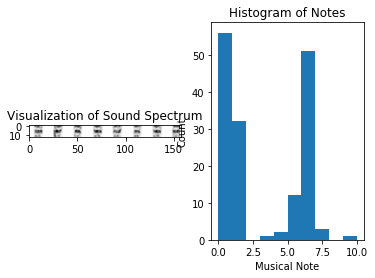

Loading ./dataset/set_a/murmur__201101180902.wav


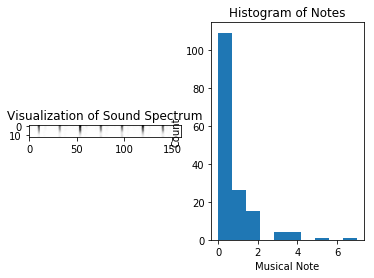

In [ ]:
init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

with tf.Session() as sess:
    sess.run(init)
    X, names = get_dataset(sess)
    centroids = initial_cluster_centroids(X, k)
    i, converged = 0, False
    while not converged and i < max_iterations:
        i += 1
        Y = assign_cluster(X, centroids)
        centroids = sess.run(recompute_centroids(X, Y))
    for y, name in zip(sess.run(Y), names):
        print(y, name)